In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns


In [2]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0299-09.SALT.nc')
plotvar = data.variables['SALT'][0,:,:]
lont = data.variables['TLONG']
latt = data.variables['TLAT']

In [3]:
lont = lont[271:343,1100:1300]
latt = latt[271:343,1100:1300]
plotvar = plotvar[:,271:343,1100:1300]
#plotvar[plotvar == '--'] = np.nan

In [4]:
plotvar = np.nanmean(plotvar,axis=1)

In [5]:
plotvar.shape

(62, 200)

In [6]:
#data1=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn/hist/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0125-08.z_w_top.nc')
#A = data1.variables['z_w_top'][:]/100

In [7]:
#data2=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn/hist/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0118-10.PD.nc')
#PD = data2.variables['PD'][0,:,:]

In [8]:
#PD = PD[:,340,1100:1250]
#PD = (PD-1)*1000

In [9]:
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn1/z_t.nc')
A = data1.variables['z_t'][:]/100
B=lont[0,:]

xx, yy = np.meshgrid(B, A)
###############################################################
###############################################################
my_font = {'fontname':'Cambria', 'size':'15'}
nice_cmap=sns.diverging_palette(245, 15, n=11,as_cmap=True)
lev_cmap = nice_cmap([1,10,20,30,50,60,70,80,90,100,110,130,150,170,190,210,230,240]) 
#lev_cmap = nice_cmap([10,20,50,70,100,110,130,150,170,190,210,230,240])
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
#nice_levels = [34.35,34.45,34.5,34.6]
nice_levels = [34.1,34.15,34.2,34.25,34.3,34.35,34.4,34.45,34.5,34.55,34.6,34.62,34.64,34.66,34.68,34.70,34.72,34.74,34.76,34.78,34.8]
#nice_levels = [-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,0,0.4,0.6,0.8,1.0,1.2]
nice_levels = [34.1,34.15,34.2,34.25,34.3,34.35,34.4,34.45,34.5,34.55,34.6,34.65,34.7,34.75,34.8]
nice_levels2 = [34.1,34.2,34.3,34.4,34.5,34.6,34.7,34.8]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************
#********************************************************************
#********************************************************************

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'spacing'
  after removing the cwd from sys.path.
/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'spacing'
  """
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


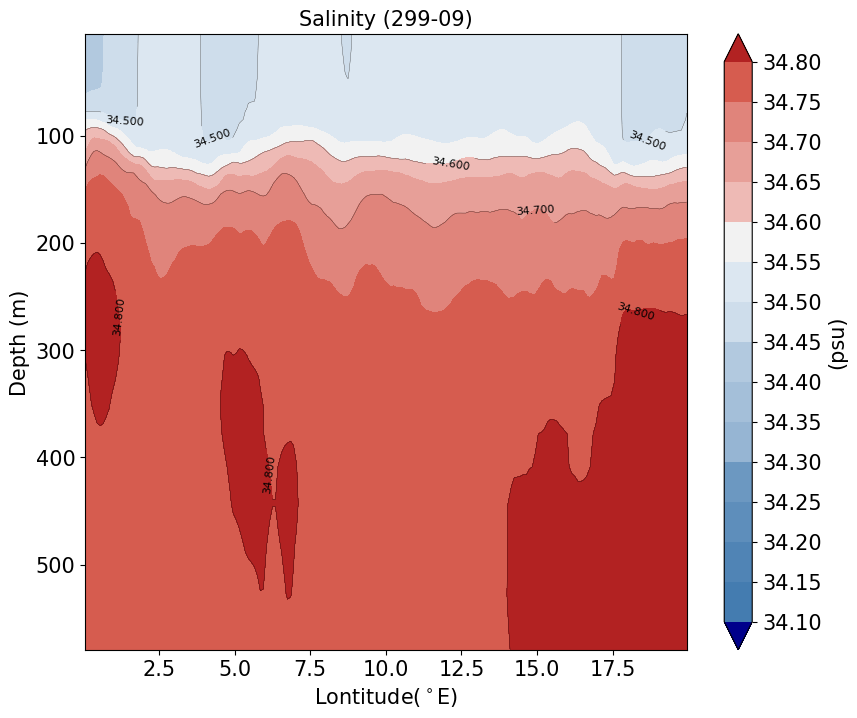

In [10]:
# plot the result
fig = plt.figure(figsize=(9.4, 7.7), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
im = ax0.contourf(xx[:35,:], yy[:35,:], plotvar[:35,:],cmap=new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
MP = ax0.contour(xx[:35,:], yy[:35,:], plotvar[:35,:],spacing = 'uniform',levels = nice_levels2,colors = 'black', linestyles = 'solid',linewidths=0.2)
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
ax0.set_facecolor("grey")
#ax0.imshow(np.where(plotvar.mask)[0],np.where(plotvar.mask)[1])
#CS = ax0.contour(xx[:49,:], yy[:49,:], PD[:49,:],[27.74,27.75,27.76,27.77,27.78,27.785,27.786,27.787,27.788],colors = 'black', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, fontsize=10)
cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels,spacing='uniform')
cbar.ax.tick_params(labelsize=15)
cbar.set_label('(psu)', **my_font)
#############################################################################
##设定X坐标值
#plt.xticks(range(0,120,20), ['66.2$^\circ$S', '65.3$^\circ$S', '64.5$^\circ$S','63.6$^\circ$S','62.8$^\circ$S'])
#plt.yticks(range(0,61,5), ['5', '55','105', '155', '210', '285','408','638','1106','1968','3133','4375','5625'])
plt.yticks(**my_font)
plt.xticks(**my_font)
plt.clabel(MP, inline=1, fontsize=8)
#plt.xticks(range(0,15,2), ['0$^\circ$', '2$^\circ$E', '4$^\circ$E', '6$^\circ$E', '8$^\circ$E','10$^\circ$E','12$^\circ$E','14$^\circ$E'],**my_font)
plt.xlabel('Lontitude($^\circ$E)', **my_font)
plt.ylabel('Depth (m)', **my_font)
plt.gca().invert_yaxis()
ax0.set_title('Salinity (299-09)',**my_font)
plt.savefig("salinitycross299-09.png")

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'spacing'
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Temperature (300-09)')

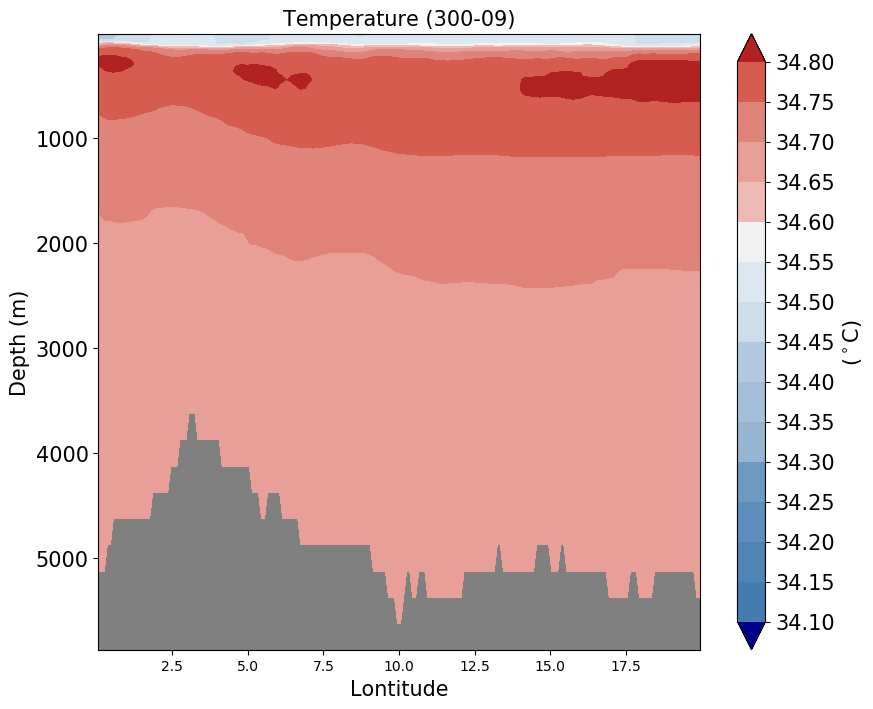

In [11]:
# plot the result
fig = plt.figure(figsize=(9.4, 7.7), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
im = ax0.contourf(xx[:,:], yy[:,:], plotvar[:,:],cmap=new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
ax0.set_facecolor("grey")
#ax0.imshow(np.where(plotvar.mask)[0],np.where(plotvar.mask)[1])
#CS = ax0.contour(xx[:49,:], yy[:49,:], PD[:49,:],[27.74,27.75,27.76,27.77,27.78,27.785,27.786,27.787,27.788],colors = 'black', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, fontsize=10)
cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels,spacing='uniform')
cbar.ax.tick_params(labelsize=15)
cbar.set_label('($^\circ$C)', **my_font)
#############################################################################
##设定X坐标值
#plt.xticks(range(0,120,20), ['66.2$^\circ$S', '65.3$^\circ$S', '64.5$^\circ$S','63.6$^\circ$S','62.8$^\circ$S'])
#plt.yticks(range(0,61,5), ['5', '55','105', '155', '210', '285','408','638','1106','1968','3133','4375','5625'])
plt.yticks(**my_font)
#plt.xticks(range(0,15,2), ['0$^\circ$', '2$^\circ$E', '4$^\circ$E', '6$^\circ$E', '8$^\circ$E','10$^\circ$E','12$^\circ$E','14$^\circ$E'],**my_font)
plt.xlabel('Lontitude', **my_font)
plt.ylabel('Depth (m)', **my_font)
plt.gca().invert_yaxis()
ax0.set_title('Temperature (300-09)',**my_font)
#plt.savefig("salinitycross298-09.png")